In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

正規分布に従う乱数（50個）を生成

In [2]:
x = np.random.normal(1, 0.3, (1, 50))
y = np.random.normal(1, 0.3, (1, 50))
print(">>>X")
print(x)
print(">>>Y")
print(y)

>>>X
[[0.93657076 1.3277224  1.39662282 0.47165784 0.86058487 0.9845846
  1.07459462 1.26826745 1.03820437 0.67110782 0.9881744  0.97596457
  1.2814292  0.886359   0.87921319 0.56120135 1.30448058 1.08022389
  1.14684341 1.1211039  0.82215506 1.13736709 1.0035064  1.19205052
  0.84863977 1.2475801  0.92276011 0.89292926 1.08997716 0.94826289
  1.19454825 0.81184906 0.74898143 1.20945627 0.92104516 0.99019206
  1.39204196 1.73643871 0.97468447 0.78117969 0.74968864 1.07034697
  0.32883711 1.32166448 0.92555716 0.59110839 1.75543778 1.265854
  0.47974082 1.17650377]]
>>>Y
[[0.64947747 0.3806196  1.35844359 0.93842103 0.72637423 0.63752292
  1.10842381 1.18021202 0.88687097 1.40311754 0.98843689 0.90657683
  0.87157181 0.94566754 0.64571158 1.2301767  0.75996304 1.41084101
  0.6503466  1.2949046  0.88993677 0.93324367 0.5985951  0.78426463
  1.42299665 0.88900392 1.03932315 1.21536454 0.75699599 0.81615712
  0.81163334 1.05119961 1.00971061 1.19828259 1.11732405 0.83915814
  1.42195884 1.

分かりにくいのでグラフにプロット

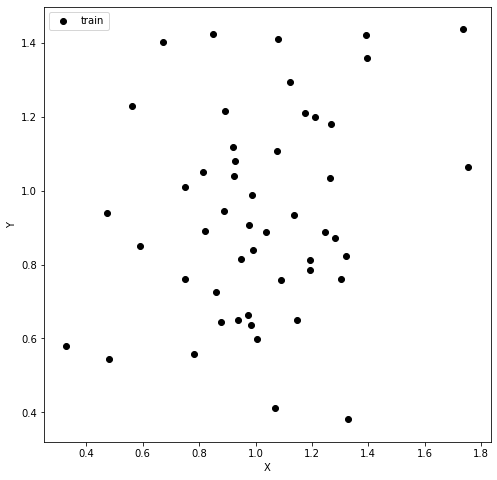

In [3]:
plt.figure(figsize=(8,8))
plt.scatter(x, y, c='black', label='train')
plt.legend(fontsize=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

正常っぽいデータ(normal)を設定<br>
異常っぽいデータ(anomaly)を設定

In [0]:
normal = np.array([1.0, 1.0])
anomaly = np.array([0.6, 0.4])

データと共にプロット

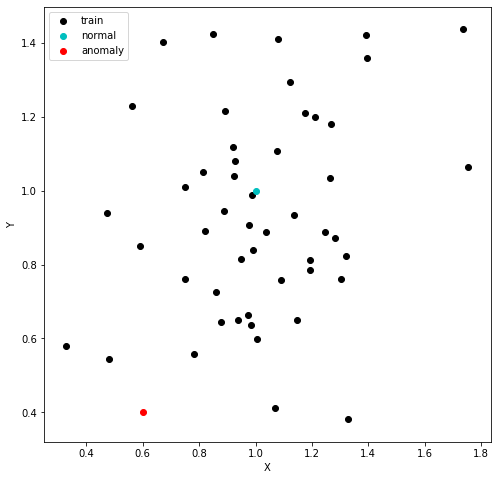

In [5]:
plt.figure(figsize=(8,8))
plt.scatter(x, y, c='black', label='train')
plt.scatter(normal[0], normal[1], c="c", label="normal")
plt.scatter(anomaly[0], anomaly[1], c="r", label="anomaly")
plt.legend(fontsize=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# K近傍法(K = 3) 処理実行 

In [0]:
# np.vstack((x,y)).T の結果確認用
#zz = np.vstack((x,y))
#print(zz)
#print(zz.shape)
#zz_t = np.vstack((x,y)).T
#print(zz_t)
#print(zz_t.shape)

In [7]:
knn = NearestNeighbors(n_neighbors=3)
# x,yを縦につなげて転置した行列（（x_i, y_i）のデータの列になります）を入力して実行
knn.fit(np.vstack((x, y)).T) 
dist_normal  = knn.kneighbors(normal.reshape(1,-1))[0] # (距離, データindex)の配列を返すので[0]
dist_anomaly = knn.kneighbors(anomaly.reshape(1,-1))[0]
print(dist_normal)
print(dist_anomaly)

[[0.01653936 0.08667359 0.09646549]]
[[0.1878881  0.23958689 0.32566929]]


選択されたデータをグラフに表示

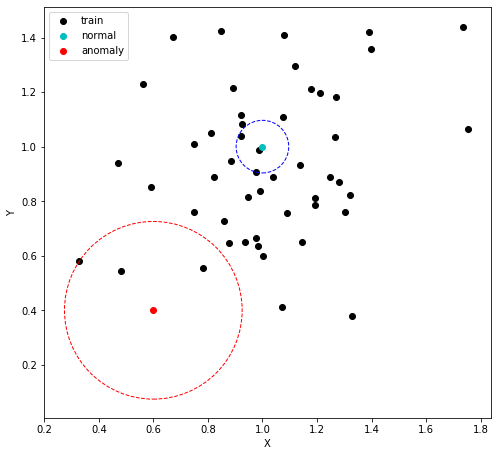

In [8]:
import matplotlib.patches as patches
plt.figure(figsize=(8,8))

ax = plt.axes()
c_normal = patches.Circle(xy=(normal[0], normal[1]), radius=dist_normal[0][2], fill=False, ec='b', linestyle='--')
c_anomaly = patches.Circle(xy=(anomaly[0], anomaly[1]), radius=dist_anomaly[0][2], fill=False, ec='r', linestyle='--')
ax.add_patch(c_normal)
ax.add_patch(c_anomaly)

plt.scatter(x, y, c='black', label='train')
plt.scatter(normal[0], normal[1], c="c", label="normal")
plt.scatter(anomaly[0], anomaly[1], c="r", label="anomaly")
plt.legend(fontsize=10)
plt.xlabel('X')
plt.ylabel('Y')
#plt.axis('scaled')
ax.set_aspect('equal')
plt.show()

KNNの問題点：データに疎密がある場合は正しく判断できない

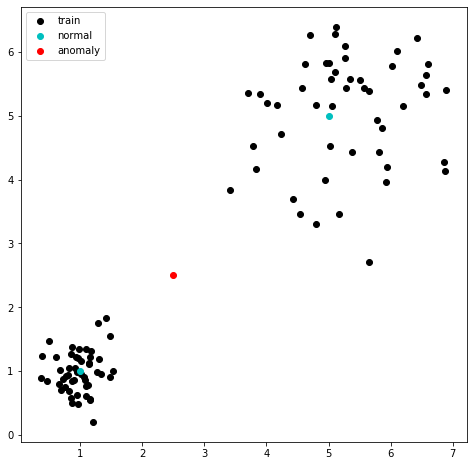

In [9]:
x1 = np.random.normal(1, 0.3, (1, 50))
y1 = np.random.normal(1, 0.3, (1, 50))

x2 = np.random.normal(5, 1, (1, 50))
y2 = np.random.normal(5, 1, (1, 50))

xx = np.hstack((x1, x2))
yy = np.hstack((y1, y2))
normal_x = np.array([1.0, 5.0])
normal_y = np.array([1.0, 5.0])
anomaly = np.array([2.5, 2.5])

plt.figure(figsize=(8,8))
plt.scatter(x1,y1,c="black",label="train")
plt.scatter(x2,y2,c="black")
plt.scatter(normal_x, normal_y, c='c', label="normal")
plt.scatter(anomaly[0], anomaly[1], c="r", label="anomaly")
plt.legend(fontsize=10)
plt.show()

In [10]:
knn = NearestNeighbors(n_neighbors=5)
# x,yを縦につなげて転置した行列（（x_i, y_i）のデータの列になります）を入力して実行
knn.fit(np.vstack((xx, yy)).T) 

normal1 = np.array([normal_x[0], normal_y[0]])
normal2 = np.array([normal_x[1], normal_y[1]])
dist_normal1  = knn.kneighbors(normal1.reshape(1,-1))[0] # (距離, データindex)の配列を返すので[0]
dist_normal2  = knn.kneighbors(normal2.reshape(1,-1))[0]
dist_anomaly = knn.kneighbors(anomaly.reshape(1,-1))[0]
print(dist_normal1)
print(dist_normal2)
print(dist_anomaly)

[[0.04098969 0.04648843 0.09625668 0.11577135 0.15317318]]
[[0.1687698  0.26433516 0.46811827 0.52449939 0.57682253]]
[[1.27170524 1.39418788 1.41900978 1.61274597 1.76483126]]


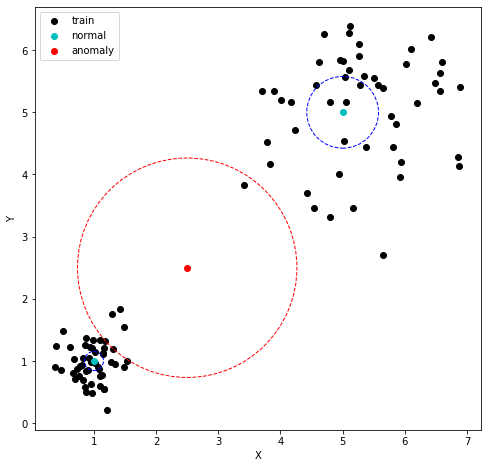

In [15]:
plt.figure(figsize=(8, 8))
ax = plt.axes()
c_normal1 = patches.Circle(xy=(normal_x[0], normal_y[0]), radius=dist_normal1[0][4], fill=False, ec='b', linestyle='--')
c_normal2 = patches.Circle(xy=(normal_x[1], normal_y[1]), radius=dist_normal2[0][4], fill=False, ec='b', linestyle='--')
c_anomaly = patches.Circle(xy=(anomaly[0], anomaly[1]), radius=dist_anomaly[0][4], fill=False, ec='r', linestyle='--')
ax.add_patch(c_normal1)
ax.add_patch(c_normal2)
ax.add_patch(c_anomaly)
plt.scatter(xx, yy, c='black', label='train')
plt.scatter(normal_x, normal_y, c="c", label="normal")
plt.scatter(anomaly[0], anomaly[1], c="r", label="anomaly")
plt.legend(fontsize=10)
plt.xlabel('X')
plt.ylabel('Y')
#plt.axis('scaled')
ax.set_aspect('equal')
plt.show()